# Чтение данных

In [1]:
import json
from models import Request # Датакласс для входных данных
from models import Coordinates

In [2]:
with open("data_1.json") as f:
    request = json.load(f)
    r = Request.from_dict(request)

# Визуализация на карте

In [3]:
!pip3 install folium
import folium


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [4]:
moscow_coords = Coordinates(55.75222, 37.61556)
ekaterenburg_coords = Coordinates(56.838008, 60.597452)


moscow_coords


Coordinates(lat=55.75222, lon=37.61556)

In [5]:
r.move(ekaterenburg_coords)

TypeError: unsupported operand type(s) for +: 'int' and 'Coordinates'

In [7]:
M = folium.Map(location=[*ekaterenburg_coords], zoom_start=11)

for point in request["points"]:
    lat, lon = point["position"]

    folium.Marker(
        location=[lat + delta.lat, lon + delta.lon],
        popup=point["position"],
        icon=folium.Icon(icon="star", color="orange"),
    ).add_to(M)
M.save("map.html")

NameError: name 'delta' is not defined

In [8]:
M


# Граф расстояний

In [9]:
!pip3 install numpy networkx matplotlib scipy


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x1588723e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

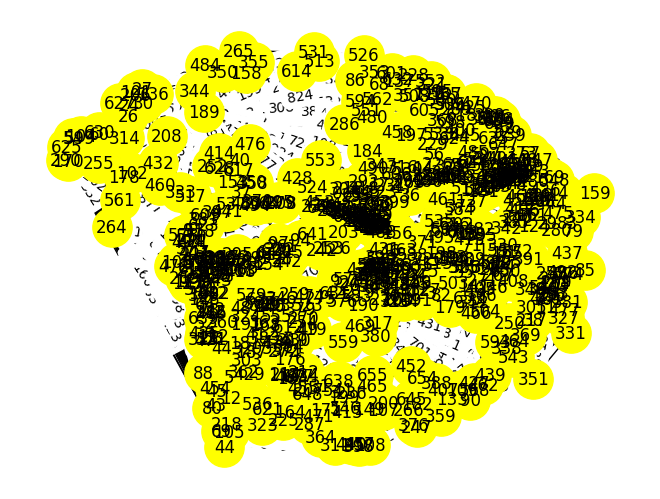

In [11]:
distance_matrix = np.array(request['time_matrix'])

G = nx.Graph()

for i in range(r.scooter_number):
    G.add_node(i)
for i in range(r.scooter_number):
    for j in range(i+1, r.scooter_number):
        G.add_edge(i, j, weight=distance_matrix[i][j])

pos = nx.spring_layout(G, k=0.01)

nx.draw(G, pos, node_color='yellow', with_labels=True, node_size=800)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.figure(num=None, figsize=(4000, 4000), dpi=12000)
plt.show()

()

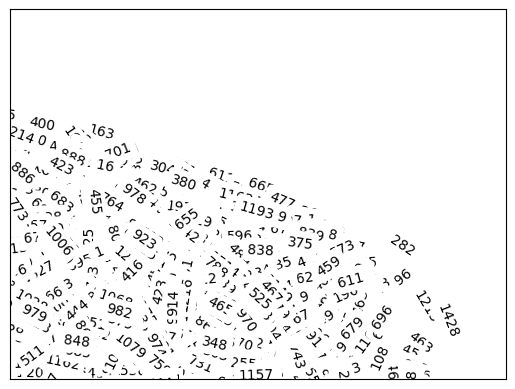

In [ ]:
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)


In [ ]:
plt.figure(num=None, figsize=(200, 200), dpi=1200)
plt.show()

<Figure size 240000x240000 with 0 Axes>